In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", end="2021-01-01", freq="B")
prices = np.cumsum(np.random.randn(len(dates)))
features = np.random.randn(len(dates), 2)

In [3]:
data = pd.DataFrame({"Date": dates, "Price": prices, "Feature1": features[:, 0], "Feature2": features[:, 1]})
data.set_index("Date", inplace=True)

In [4]:
data["Price_Lag1"] = data["Price"].shift(1)
data["Price_Lag2"] = data["Price"].shift(2)

In [5]:
data.dropna(inplace=True)


In [6]:
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [7]:
X_train, y_train = train_data[["Price_Lag1", "Price_Lag2", "Feature1", "Feature2"]], train_data["Price"]
X_test, y_test = test_data[["Price_Lag1", "Price_Lag2", "Feature1", "Feature2"]], test_data["Price"]

In [8]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [9]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

In [10]:
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

In [11]:
linear_mse = mean_squared_error(y_test, linear_predictions)
tree_mse = mean_squared_error(y_test, tree_predictions)
forest_mse = mean_squared_error(y_test, forest_predictions)


In [12]:
print(f"Linear Regression Mean Squared Error: {linear_mse}")
print(f"Decision Tree Regression Mean Squared Error: {tree_mse}")
print(f"Random Forest Regression Mean Squared Error: {forest_mse}")

Linear Regression Mean Squared Error: 1.2692202278134734
Decision Tree Regression Mean Squared Error: 3.2712679924611336
Random Forest Regression Mean Squared Error: 2.146062159614306


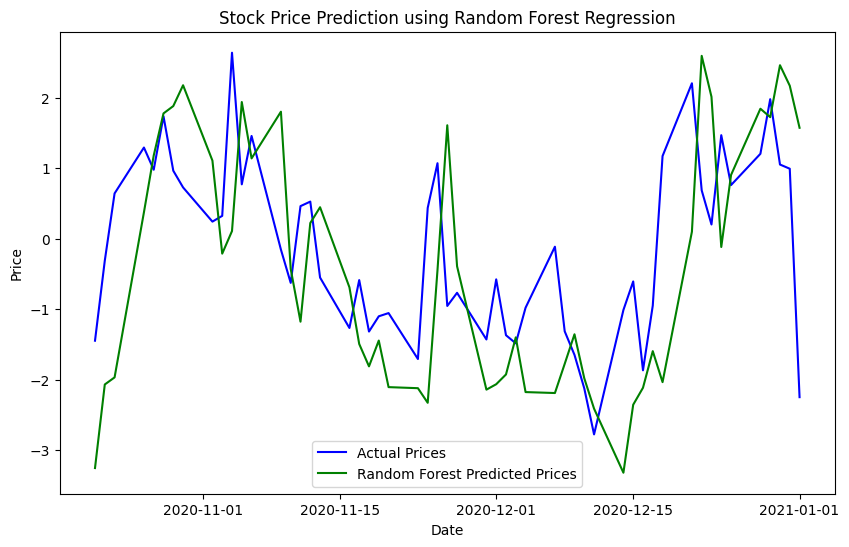

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, y_test, label="Actual Prices", color="blue")
plt.plot(test_data.index, forest_predictions, label="Random Forest Predicted Prices", color="green")
plt.title("Stock Price Prediction using Random Forest Regression")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()